# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
# %pip install --upgrade plotly

## Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [4]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

In [5]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
# Shape of the DataFrames

print("Median Household Income Shape:", df_hh_income.shape, '\n')
print("Percentage Below Poverty Shape:", df_pct_poverty.shape, '\n')
print("Percentage Completed High School Shape:", df_pct_completed_hs.shape, '\n')
print("Share of Tace by City Shape Shape:", df_share_race_city.shape, '\n')
print("Fatalities Shape:", df_fatalities.shape)

Median Household Income Shape: (29322, 3) 

Percentage Below Poverty Shape: (29329, 3) 

Percentage Completed High School Shape: (29329, 3) 

Share of Tace by City Shape Shape: (29268, 7) 

Fatalities Shape: (2535, 14)


In [7]:
# Number of rows and columns
print("Median Household Income Rows:", df_hh_income.shape[0], "Columns:", df_hh_income.shape[1], '\n')
print("Percentage Below Poverty Rows:", df_pct_poverty.shape[0], "Columns:", df_share_race_city.shape[1], '\n')
print("Percentage Completed High School Rows:", df_pct_completed_hs.shape[0], "Columns:", df_pct_completed_hs.shape[1], '\n')
print("Share of Tace by City Shape Rows:", df_share_race_city.shape[0], "Columns:", df_share_race_city.shape[1], '\n')
print("Fatalities Rows:", df_fatalities.shape[0], "Columns:", df_fatalities.shape[1])

Median Household Income Rows: 29322 Columns: 3 

Percentage Below Poverty Rows: 29329 Columns: 7 

Percentage Completed High School Rows: 29329 Columns: 3 

Share of Tace by City Shape Rows: 29268 Columns: 7 

Fatalities Rows: 2535 Columns: 14


In [8]:
# Let's display the columns name

print("Median Household Income Colums:", df_hh_income.columns.tolist(), '\n')
print("Percentage Below Poverty Columns:", df_pct_poverty.columns.tolist(), '\n')
print("Percentage Completed High School Columns:", df_pct_completed_hs.columns.tolist(), '\n')
print("Share of Tace by City Shape Columns:", df_share_race_city.columns.tolist(), '\n')
print("Fatalities Columns:", df_fatalities.columns.tolist())

Median Household Income Colums: ['Geographic Area', 'City', 'Median Income'] 

Percentage Below Poverty Columns: ['Geographic Area', 'City', 'poverty_rate'] 

Percentage Completed High School Columns: ['Geographic Area', 'City', 'percent_completed_hs'] 

Share of Tace by City Shape Columns: ['Geographic area', 'City', 'share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic'] 

Fatalities Columns: ['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender', 'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level', 'flee', 'body_camera']


In [9]:
# Checking for missing values and duplicates

print("============= Missing values in each columns =================", '\n')

print("Median Household Income NaN Values:", df_hh_income.isnull().sum(), '\n')
print("Percentage Below Poverty NaN Values:", df_pct_poverty.isnull().sum(), '\n')
print("Percentage Completed High School NaN Values:", df_pct_completed_hs.isnull().sum(), '\n')
print("Share of Tace by City Shape NaN Values:", df_share_race_city.columns.isnull().sum(), '\n')
print("Fatalities NaN Values:", df_fatalities.columns.isnull().sum(), '\n')

print("============ Checking duplicates in each rows ================", '\n')

print("Median Household Income Duplicates:", df_hh_income.duplicated().sum(), '\n')
print("Percentage Below Poverty Duplicates:", df_pct_poverty.duplicated().sum(), '\n')
print("Percentage Completed High School Duplicates:", df_pct_completed_hs.duplicated().sum(), '\n')
print("Share of Tace by City Shape Duplicates:", df_share_race_city.duplicated().sum(), '\n')
print("Fatalities Duplicates:", df_fatalities.columns.duplicated().sum())


============= Missing values in each columns ================= 

Median Household Income NaN Values: Geographic Area     0
City                0
Median Income      51
dtype: int64 

Percentage Below Poverty NaN Values: Geographic Area    0
City               0
poverty_rate       0
dtype: int64 

Percentage Completed High School NaN Values: Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64 

Share of Tace by City Shape NaN Values: 0 

Fatalities NaN Values: 0 

============ Checking duplicates in each rows ================ 

Median Household Income Duplicates: 0 

Percentage Below Poverty Duplicates: 0 

Percentage Completed High School Duplicates: 0 

Share of Tace by City Shape Duplicates: 0 

Fatalities Duplicates: 0


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [10]:
# Replace NaN with 0 in each DataFrame
df_hh_income = df_hh_income.fillna(0)
df_pct_poverty = df_pct_poverty.fillna(0)
df_pct_completed_hs = df_pct_completed_hs.fillna(0)
df_share_race_city = df_share_race_city.fillna(0)
df_fatalities = df_fatalities.fillna(0)

In [11]:
df_hh_income

,Geographic Area,City,Median Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667
...,...,...,...
29317,WY,Woods Landing-Jelm CDP,0
29318,WY,Worland city,41523
29319,WY,Wright town,77114
29320,WY,Yoder town,37500


In [12]:
# Check for missing values after replacement
print("Median Household Income NaN Values After Replacement:\n", df_hh_income.isnull().sum())
print("Percentage Below Poverty NaN Values After Replacement:\n", df_pct_poverty.isnull().sum())
print("Percentage Completed High School NaN Values After Replacement:\n", df_pct_completed_hs.isnull().sum())
print("Share of Race by City NaN Values After Replacement:\n", df_share_race_city.isnull().sum())
print("Fatalities NaN Values After Replacement:\n", df_fatalities.isnull().sum())

Median Household Income NaN Values After Replacement:
 Geographic Area    0
City               0
Median Income      0
dtype: int64
Percentage Below Poverty NaN Values After Replacement:
 Geographic Area    0
City               0
poverty_rate       0
dtype: int64
Percentage Completed High School NaN Values After Replacement:
 Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64
Share of Race by City NaN Values After Replacement:
 Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64
Fatalities NaN Values After Replacement:
 id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                   

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [13]:
# Let's first display the Poverty rate dataset for visualization
df_pct_poverty.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [14]:
df_pct_poverty.describe()
df_pct_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [15]:
print(df_pct_poverty.columns)

Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')


In [16]:
""" 
The dataset includes columns for the Geographic Area (State abbreviation),
City, and Poverty Rate. To create a state-level analysis, we aggregate 
the poverty rate by state, calculating the mean poverty rate for each state.
Then, we generate a bar chart ranking states from highest to lowest poverty 
rate. So let's proceed!
"""

" \nThe dataset includes columns for the Geographic Area (State abbreviation),\nCity, and Poverty Rate. To create a state-level analysis, we aggregate \nthe poverty rate by state, calculating the mean poverty rate for each state.\nThen, we generate a bar chart ranking states from highest to lowest poverty \nrate. So let's proceed!\n"

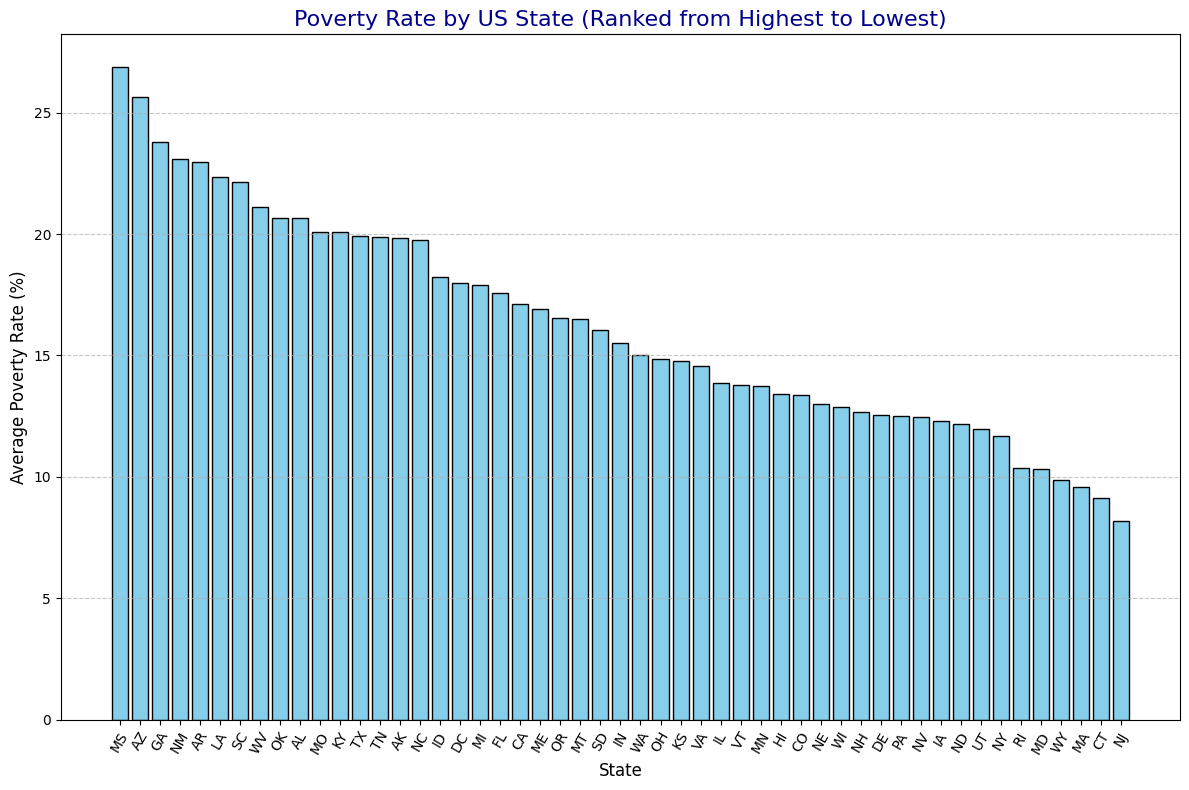

State with the highest poverty rate: MS (26.88%)
State with the lowest poverty rate: NJ (8.19%)


In [17]:
# let's replace the Geographic Area column denomination by state

# df_pct_poverty["Geographic Area"] = df_pct_poverty["State"]

# Let's convert poverty_rate column to numeric (handling possible errors)

df_pct_poverty["poverty_rate"] = pd.to_numeric(df_pct_poverty["poverty_rate"], errors="coerce")

# Let's aggregate by state (Geograpihc Area) using the mean poverty rate
# And Calculating the the mean poverty rate

df_pct_poverty = df_pct_poverty.groupby("Geographic Area")["poverty_rate"].mean().reset_index()
df_pct_poverty = df_pct_poverty.sort_values(by="poverty_rate", ascending=False)

# Plotting the bar chart
plt.figure(figsize=(12, 8))
plt.bar(df_pct_poverty['Geographic Area'],
        df_pct_poverty['poverty_rate'],
        color='skyblue',
        edgecolor="black")
plt.xlabel('State', fontsize=12)
plt.ylabel('Average Poverty Rate (%)', fontsize=12)
plt.title('Poverty Rate by US State (Ranked from Highest to Lowest)',
          color="darkblue",
          fontsize=16)
plt.xticks(rotation=60,
           fontsize=10)
plt.grid(axis="y",
         linestyle="--",
         alpha=0.7)
plt.tight_layout()
plt.show()

# Identifying the state with the highest and lowest poverty rate
highest_state = df_pct_poverty.loc[df_pct_poverty["poverty_rate"].idxmax(), "Geographic Area"]
lowest_state = df_pct_poverty.loc[df_pct_poverty["poverty_rate"].idxmin(), "Geographic Area"]

highest_poverty_rate = df_pct_poverty["poverty_rate"].max()
lowest_poverty_rate = df_pct_poverty["poverty_rate"].min()

print(f"State with the highest poverty rate: {highest_state} ({highest_poverty_rate:.2f}%)")
print(f"State with the lowest poverty rate: {lowest_state} ({lowest_poverty_rate:.2f}%)")


# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [18]:
# Let's display few rows of the dataset

df_pct_completed_hs.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


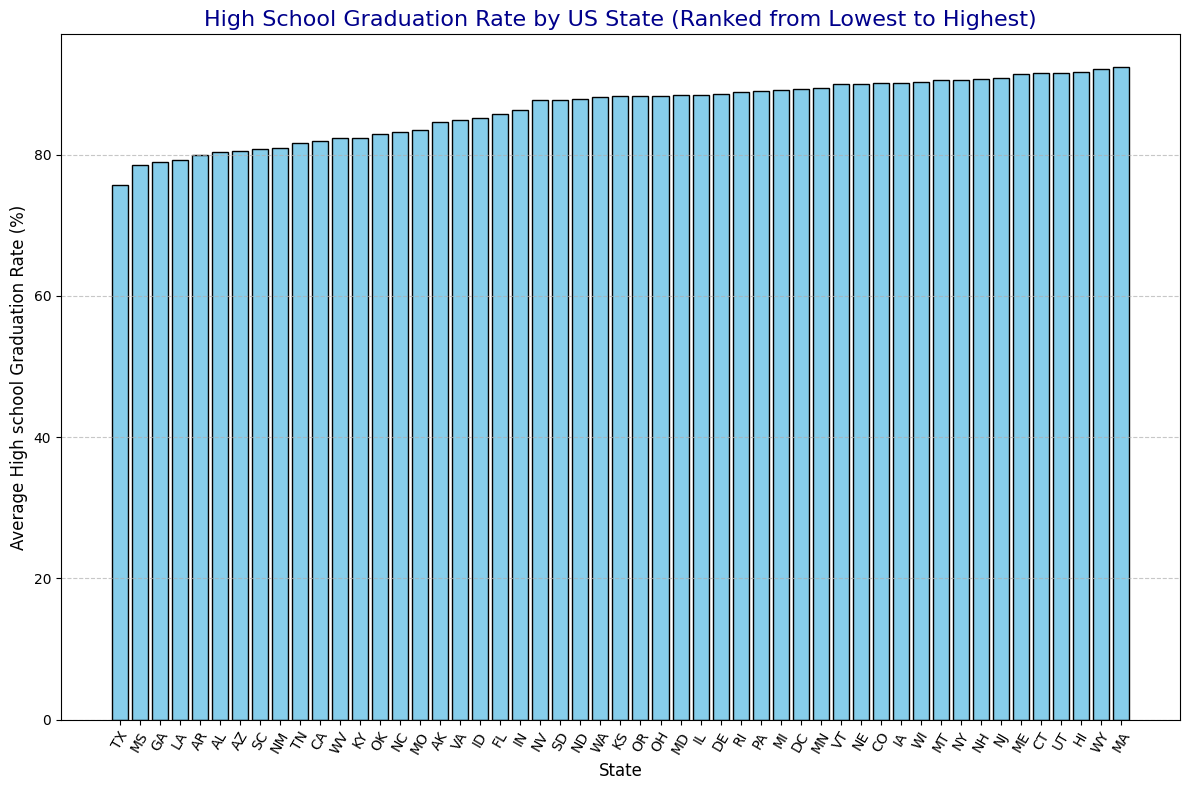

State with the highest Graduation rate: MA ( 92.40%)
State with the lowest Graduation rate: TX (75.69%)


In [19]:
# let's replace the Geographic Area column denomination by state

# df_pct_completed_hs["Geographic Area"] = df_pct_completed_hs["State"]

# Let's convert percent_completed_hs column to numeric (handling possible errors)

df_pct_completed_hs["percent_completed_hs"] = pd.to_numeric(df_pct_completed_hs["percent_completed_hs"], errors="coerce")

# Let's aggregate by state (Geograpihc Area) using the mean poverty rate
# And Calculating the the mean poverty rate

df_pct_completed_hs = df_pct_completed_hs.groupby("Geographic Area")["percent_completed_hs"].mean().reset_index()
df_pct_completed_hs = df_pct_completed_hs.sort_values(by="percent_completed_hs", ascending=True)

# Plotting the bar chart
plt.figure(figsize=(12, 8))
plt.bar(df_pct_completed_hs['Geographic Area'],
        df_pct_completed_hs['percent_completed_hs'],
        color='skyblue',
        edgecolor="black")
plt.xlabel('State', fontsize=12)
plt.ylabel('Average High school Graduation Rate (%)', fontsize=12)
plt.title('High School Graduation Rate by US State (Ranked from Lowest to Highest)',
          color="darkblue",
          fontsize=16)
plt.xticks(rotation=60,
           fontsize=10)
plt.grid(axis="y",
         linestyle="--",
         alpha=0.7)
plt.tight_layout()
plt.show()

# Identifying the state with the highest and lowest poverty rate
highest_state = df_pct_completed_hs.loc[df_pct_completed_hs["percent_completed_hs"].idxmax(), "Geographic Area"]
lowest_state = df_pct_completed_hs.loc[df_pct_completed_hs["percent_completed_hs"].idxmin(), "Geographic Area"]

highest_percent_completed_hs = df_pct_completed_hs["percent_completed_hs"].max()
lowest_percent_completed_hs = df_pct_completed_hs["percent_completed_hs"].min()

print(f"State with the highest Graduation rate: {highest_state} ({highest_percent_completed_hs: .2f}%)")
print(f"State with the lowest Graduation rate: {lowest_state} ({lowest_percent_completed_hs:.2f}%)")


# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

/var/folders/_j/rbqd6h5s157d70ss8z2qg7gm0000gn/T/ipykernel_4222/1796194379.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_merged["Geographic Area"],


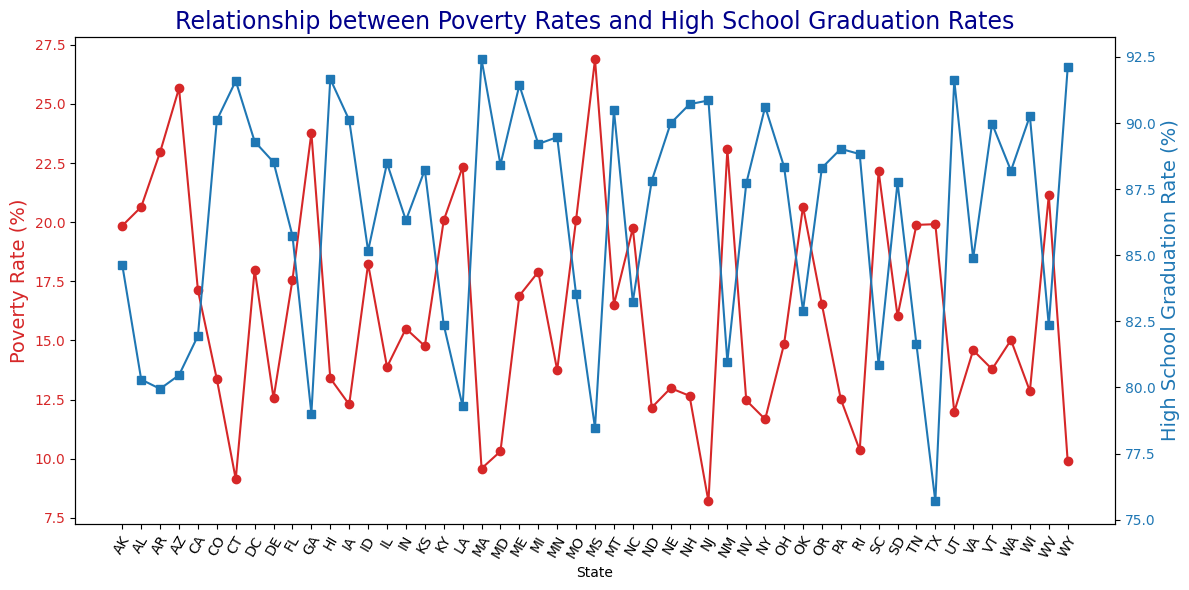

In [20]:
# Let's merged the datasets on 'Geographic Area' (State)

df_merged = pd.merge(df_pct_poverty, df_pct_completed_hs, on="Geographic Area")

# Let's sort by state name for consistency

df_merged = df_merged.sort_values("Geographic Area")

# Creation of the dual-axis plot

fig, ax1 = plt.subplots(figsize=(12, 6))

# plotting Poverty Rate
color1 = 'tab:red'
ax1.set_xlabel("State")
ax1.set_ylabel("Poverty Rate (%)", color=color1, fontsize=14)
ax1.plot(df_merged["Geographic Area"], 
         df_merged["poverty_rate"], 
         marker="o", 
         color=color1,
         label="Poverty Rate")
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_xticklabels(df_merged["Geographic Area"],
                    rotation=60,
                    fontsize=10)

# creation of the second y-axis for High School Graduation Rate 
ax2 = ax1.twinx()
color2= 'tab:blue'
ax2.set_ylabel("High School Graduation Rate (%)", color=color2, fontsize=14)
ax2.plot(df_merged["Geographic Area"],
         df_merged["percent_completed_hs"], 
         marker="s",
         color=color2,
         label="Graduation Rate")
ax2.tick_params(axis='y',
                labelcolor=color2)

# Title an Layout
plt.title("Relationship between Poverty Rates and High School Graduation Rates", 
          fontsize=17,
          color="darkblue")
fig.tight_layout()
plt.show()


#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

Text(0.5, 1.02, 'Poverty Rate vs. High School Graduation Rate')

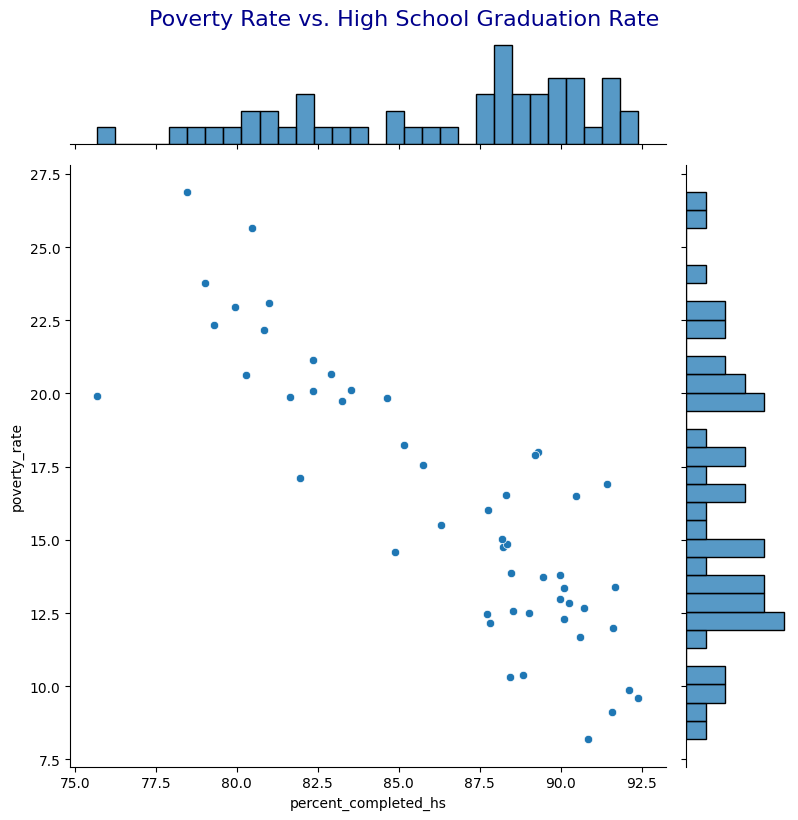

In [21]:
# Creation of the joinplot with scatter and KDE
sns.jointplot(
    data=df_merged,
    x="percent_completed_hs",
    y="poverty_rate",
    kind="scatter",
    height=8,
    marginal_kws=dict(bins=30, fill=True)
)

# Adding title
plt.suptitle("Poverty Rate vs. High School Graduation Rate",
             fontsize=16,
             color="darkblue",
             y=1.02)

Text(0.5, 1.02, 'Poverty Rate vs. High School Graduation Rate')

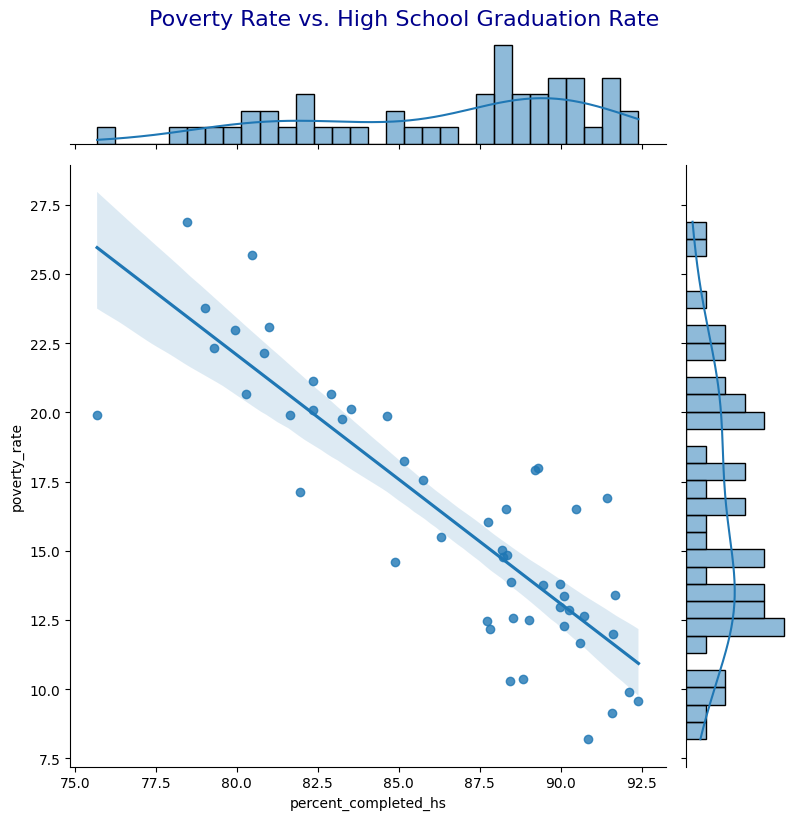

In [22]:
# Let;s do the same thing with a regression line addition

sns.jointplot(
    data=df_merged,
    x="percent_completed_hs",
    y="poverty_rate",
    kind="reg",           # Regression + scatter
    height=8,
    # color="red",
    marginal_kws=dict(bins=30, fill=True),
)

# Adding title
plt.suptitle("Poverty Rate vs. High School Graduation Rate",
             fontsize=16,
             color="darkblue",
             y=1.02)

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

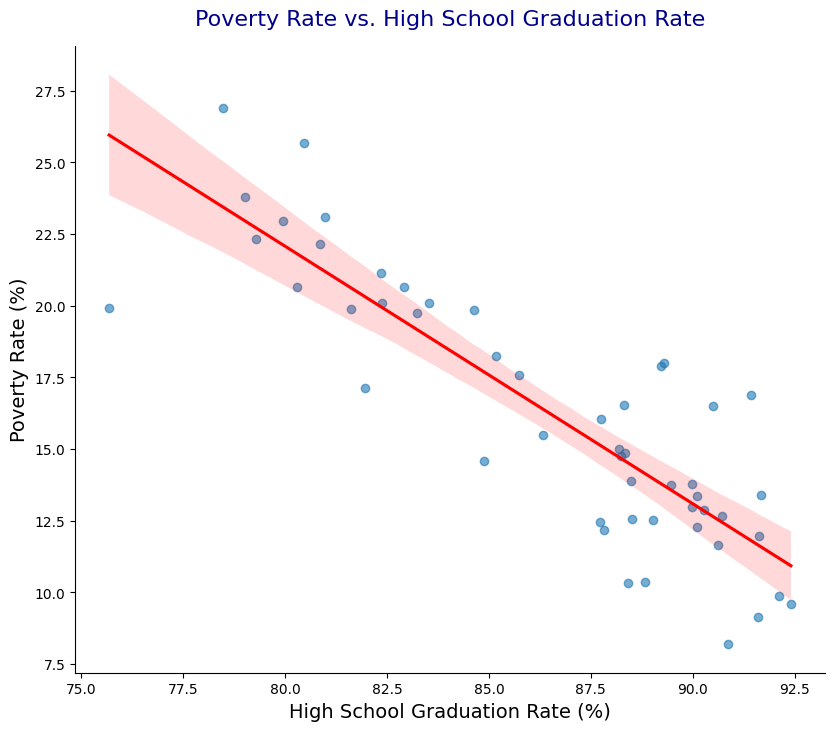

In [23]:
# using lmplot()

# Let's do the same thing with a regression line addition

sns.lmplot(
    data=df_merged,
    x="percent_completed_hs",
    y="poverty_rate",
    height=7,
    aspect=1.2,
    scatter_kws={"alpha": 0.6},
    line_kws={"color": "red"},   # reression line in red
)

# Adding title
plt.title("Poverty Rate vs. High School Graduation Rate",
             fontsize=16,
             color="darkblue",
             y=1.02)

plt.xlabel("High School Graduation Rate (%)", fontsize=14)
plt.ylabel("Poverty Rate (%)", fontsize=14)

plt.show()

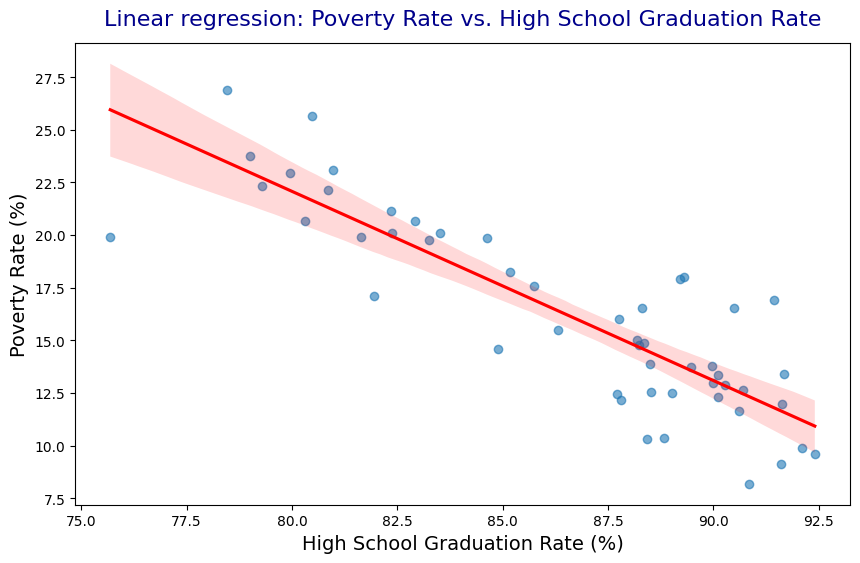

In [24]:
# Using regplot()

plt.figure(figsize=(10,6))

sns.regplot(
    data=df_merged,
    x="percent_completed_hs",
    y="poverty_rate",
    scatter_kws={"alpha": 0.6},    # To adjust transparency
    line_kws={"color": "red"}      # reression line in red
)

# Adding title
plt.title("Linear regression: Poverty Rate vs. High School Graduation Rate",
             fontsize=16,
             color="darkblue",
             y=1.02)

plt.xlabel("High School Graduation Rate (%)", fontsize=14)
plt.ylabel("Poverty Rate (%)", fontsize=14)

plt.show()


# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [25]:
# Let's display the indicated dataset

df_share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 [Text(0, 0, 'AK'),
  Text(1, 0, 'AL'),
  Text(2, 0, 'AR'),
  Text(3, 0, 'AZ'),
  Text(4, 0, 'CA'),
  Text(5, 0, 'CO'),
  Text(6, 0, 'CT'),
  Text(7, 0, 'DC'),
  Text(8, 0, 'DE'),
  Text(9, 0, 'FL'),
  Text(10, 0, 'GA'),
  Text(11, 0, 'HI'),
  Text(12, 0, 'IA'),
  Text(13, 0, 'ID'),
  Text(14, 0, 'IL'),
  Text(15, 0, 'IN'),
  Text(16, 0, 'KS'),
  Text(17, 0, 'KY'),
  Text(18, 0, 'LA'),
  Text(19, 0, 'MA'),
  Text(20, 0, 'MD'),
  Text(21, 0, 'ME'),
  Text(22, 0, 'MI'),
  Text(23, 0, 'MN'),
  Text(24, 0, 'MO'),
  Text(25, 0, 'MS'),
  Text(26, 0, 'MT'),
  Text(27, 0, 'NC'),
  Text(28, 0, 'ND'),
  Text(29, 0, 'NE'),
  Text(30, 0, 'NH'),
  Text(31, 0, 'NJ'),
  Text(32, 0, 'NM'),
  Text(33, 0, 'NV'),
  Text(34, 0, 'NY'),
  Text(35, 0, 'OH'),
  Text(36, 0, 'OK'),
  T

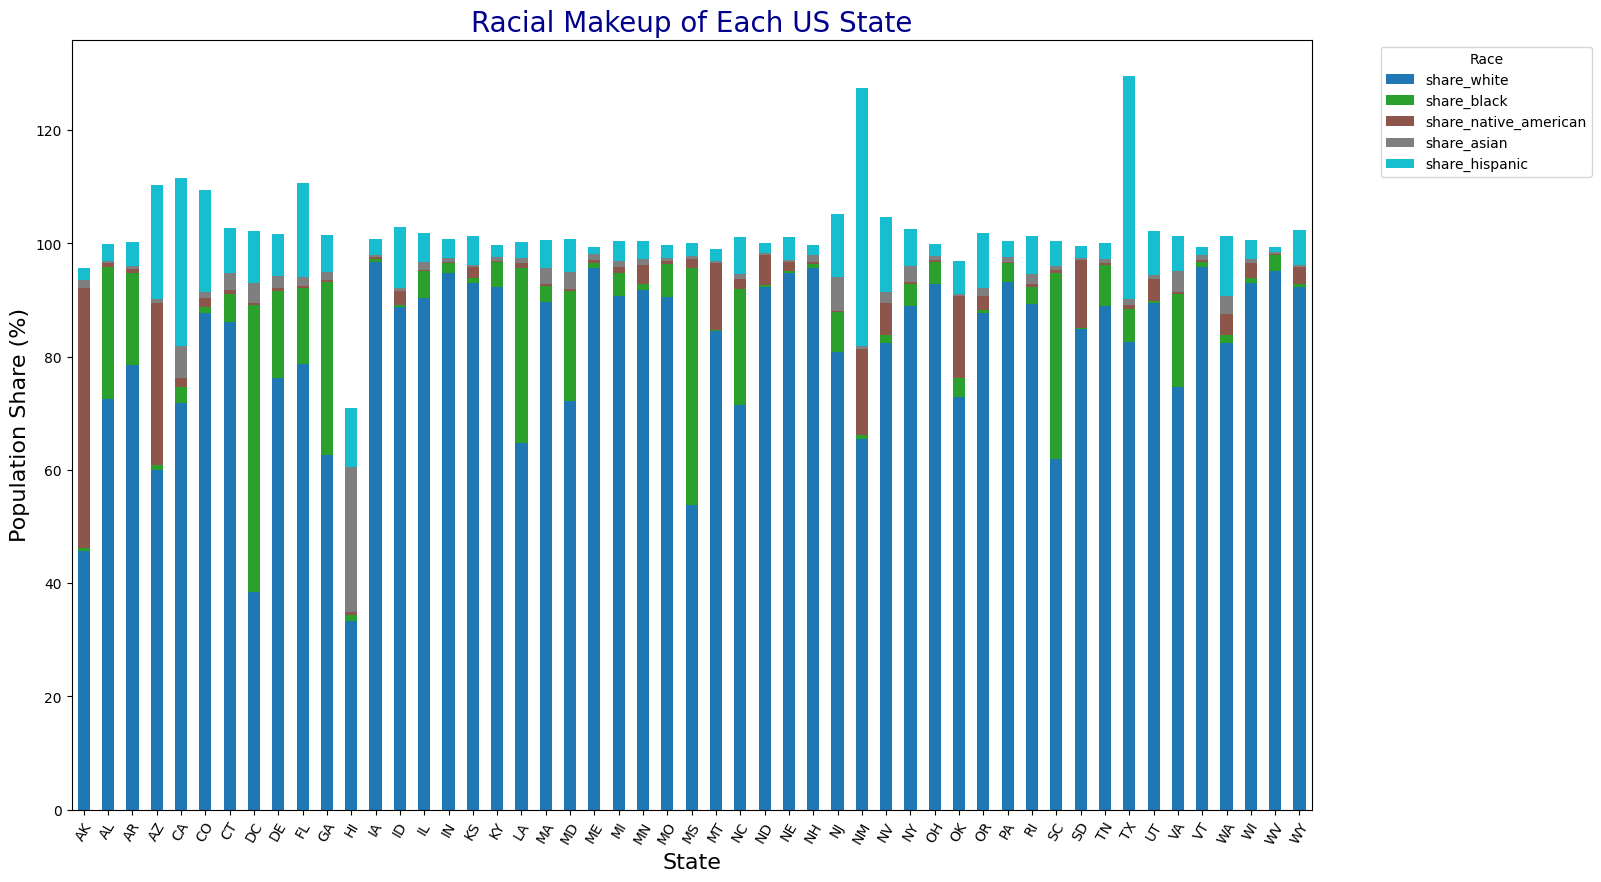

In [26]:
# Aggregating racial percentages per state

# Let's do the copy of the dataset
df_race = df_share_race_city.copy()

# Selecting relevant racial groups
races = ["share_white", "share_black", "share_native_american", 
         "share_asian", "share_hispanic"]

# Making sure we numeric tables or series

df_race[races] = df_race[races].apply(pd.to_numeric, errors="coerce")

# Performing the aggregtion on "Geographic Area"

df_race_state = df_race.groupby("Geographic area")[races].mean()

# plotting the chart

fig, ax = plt.subplots(figsize=(16,10))
df_race_state.plot(
    kind="bar",
    stacked=True,
    colormap="tab10",
    ax=ax
)

# Cutomizing our plot

plt.title("Racial Makeup of Each US State",
          fontsize=20,
          color="darkblue")
plt.xlabel("State", fontsize=16)
plt.ylabel("Population Share (%)", fontsize=16)
plt.legend(title="Race", 
           bbox_to_anchor=(1.05, 1),
           loc="upper left")
plt.xticks(rotation=60)

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [27]:
# Let's display the dataset in orther to have a glance  
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


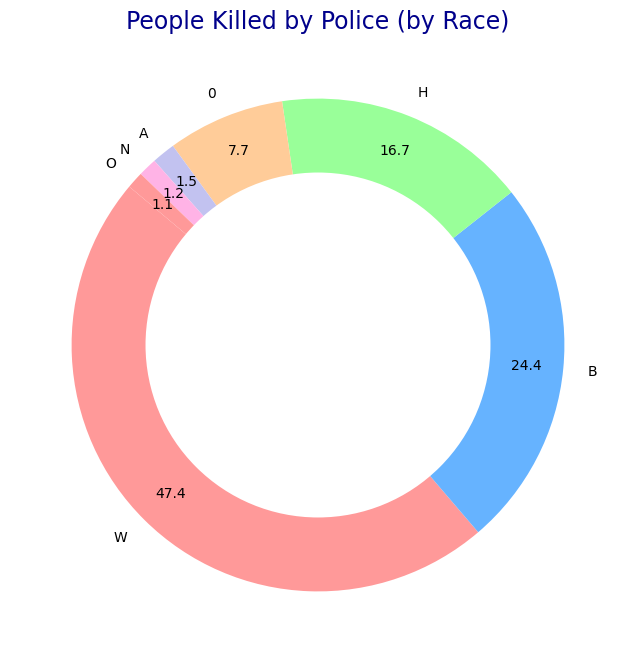

In [28]:
# Count occurences of each race

race_counts = df_fatalities["race"].value_counts()
# print(race_counts)

# Let's define colors
colors = ["#ff9999", "#66b3ff", "#99ff99", "#ffcc99", "#c2c2f0", "#ffb3e6"]

# Pie Chart creation
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    race_counts, labels=race_counts.index, autopct="%1.1f",
    colors=colors, startangle=140, pctdistance=0.85
)

# Drawing a white circle in the center to create a donut effect
center_circle = plt.Circle((0,0), 0.70, fc="white")
fig.gca().add_artist(center_circle)

# Title and styling

plt.title("People Killed by Police (by Race)", 
          fontsize=17,
          color="darkblue",
          )
# Showing the chart

plt.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).